In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import DateFormatter, MinuteLocator
# read CSV file, parse 'date' column into DateTime, set 'date' as the df index
#df = pd.read_csv("https://covid.ourworldindata.org/data/who/full_data.csv", parse_dates=['date'], index_col="date")
df = pd.read_csv("data/coronavirus/full_data_2020-03-27.csv", parse_dates=['date'], index_col="date")
# set yesterday's date for graphic
d = dt.datetime.today() - dt.timedelta(days=1)
print ('Yesterdays and time: ', d)
# Converting date into Mon DD, YYYY format
print(d.strftime('%b %d, %Y'))
#note that in the head result the date column label is listed lower than the other column labels, indicating it is the index value
#df.head(5)

Yesterdays and time:  2020-03-26 10:40:05.201382
Mar 26, 2020


In [137]:
#df.columns
df100 = df.reset_index()
#df100.head()

In [138]:
#Days since 100th case
locations = df100.location.unique()
for locs in locations:
    #loop through each row in df
    marker = 0
    for index, row in df100.iterrows():
        if row['location'] == locs:
            if row['total_cases'] < 100:
                #if locs == "United States":
                    #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']))
                df100.loc[index,'d100th_case'] = 0
            elif row['total_cases'] >= 100:
                if marker == 0:
                    marker = 1
                    df100.loc[index,'d100th_case'] = 0
                    d100 = row['date']
                    #if locs == "United States":
                        #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100))
                else:
                    timedelta = row['date'] - d100
                    timedeltaint = timedelta.days
                    df100.loc[index,'d100th_case'] = timedeltaint
                    #if locs == "United States":
                        #print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100) + ", D100 = " + str(timedeltaint))
            else:
               print("something went wrong")
               break
#df100.head()

In [139]:
df100.tail(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths,d100th_case
7203,2020-03-25,Zambia,0,0,3,0,0.0
7204,2020-03-26,Zambia,9,0,12,0,0.0
7205,2020-03-27,Zambia,2,0,14,0,0.0
7206,2020-03-21,Zimbabwe,1,0,1,0,0.0
7207,2020-03-22,Zimbabwe,1,0,2,0,0.0
7208,2020-03-23,Zimbabwe,0,0,2,0,0.0
7209,2020-03-24,Zimbabwe,0,1,2,1,0.0
7210,2020-03-25,Zimbabwe,0,0,2,1,0.0
7211,2020-03-26,Zimbabwe,1,0,3,1,0.0
7212,2020-03-27,Zimbabwe,0,0,3,1,0.0


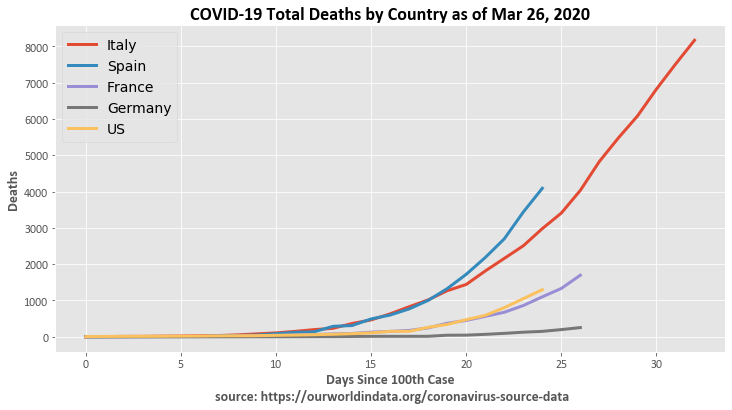

In [140]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df100g = df100.groupby('location')
#ax.plot(df100g.get_group('China')['d100th_case'], df100g.get_group('China')['total_deaths'], label='China', linewidth=3)
ax.plot(df100g.get_group('Italy')['d100th_case'], df100g.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
ax.plot(df100g.get_group('Spain')['d100th_case'], df100g.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
ax.plot(df100g.get_group('France')['d100th_case'], df100g.get_group('France')['total_deaths'], label='France', linewidth=3)
ax.plot(df100g.get_group('Germany')['d100th_case'], df100g.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
#ax.plot(df100g.get_group('South Korea')['d100th_case'], df100g.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
ax.plot(df100g.get_group('United States')['d100th_case'], df100g.get_group('United States')['total_deaths'], label='US', linewidth=3)
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#log sclae for y values
#plt.yscale("log")
ax.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 24, 2020', fontsize=20, fontweight="bold", fontname="Calibri")
plt.title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Days Since 100th Case\n source: https://ourworldindata.org/coronavirus-source-data', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.savefig('COVID-2020-03-27_100d.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [55]:
df100.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,d100th_case
0,2019-12-31,Afghanistan,0,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0,0


Text(0.5, 0, 'Date')

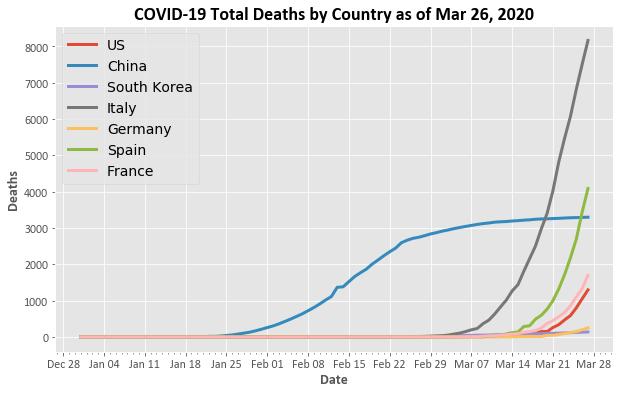

In [141]:
plt.style.use('ggplot')
dfloc = df.groupby('location')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
plt.plot(dfloc.get_group('France')['total_deaths'], label='France', linewidth=3)
#plt.xticks(rotation='85')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
# Set the font name for axis tick labels to be Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
plt.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Deaths by Country as of Mar 23, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
plt.title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")
#plt.show()
#plt.savefig('COVID-2020-03-24.png', bbox_inches='tight', pad_inches=0.2)

Text(0.5, 0, 'Date')

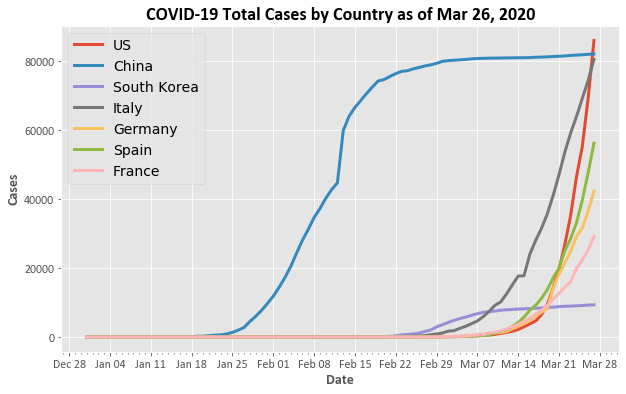

In [142]:
plt.style.use('ggplot')
dfloc = df.groupby('location')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.style.use('ggplot')
plt.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
plt.plot(dfloc.get_group('France')['total_cases'], label='France', linewidth=3)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
plt.legend(loc='best', fontsize=14)
#plt.title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
plt.title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
plt.ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

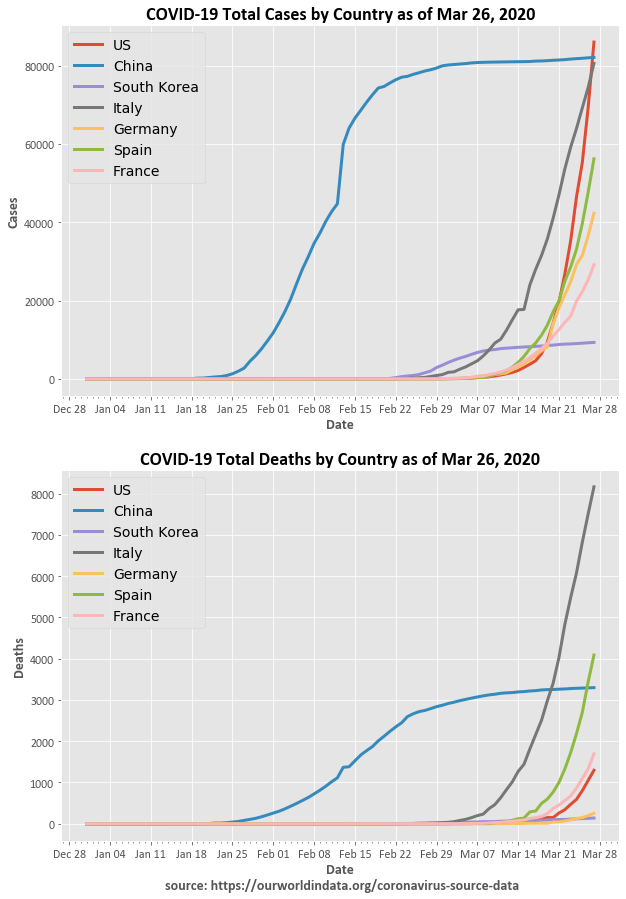

In [143]:
# Double figure for World Cases and World Deaths

plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
ax1.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
ax1.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
ax1.plot(dfloc.get_group('France')['total_cases'], label='France', linewidth=3)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.legend(loc='best', fontsize=14)
#ax1.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_title('COVID-19 Total Cases by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax1.set_xlabel('Date', fontsize=14, fontweight="bold", fontfamily="calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=3)
ax2.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
ax2.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
ax2.plot(dfloc.get_group('France')['total_deaths'], label='France', linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax2.legend(loc='best', fontsize=14)
#ax2.set_title('COVID-19 Total Cases by Country as of Mar 24, 2020', fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_title('COVID-19 Total Deaths by Country as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Deaths', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data', fontsize=14, fontweight="bold", fontfamily="calibri")
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
#plt.show()
plt.savefig('COVID-2020-03-27_US.png', bbox_inches='tight', pad_inches=0.2)

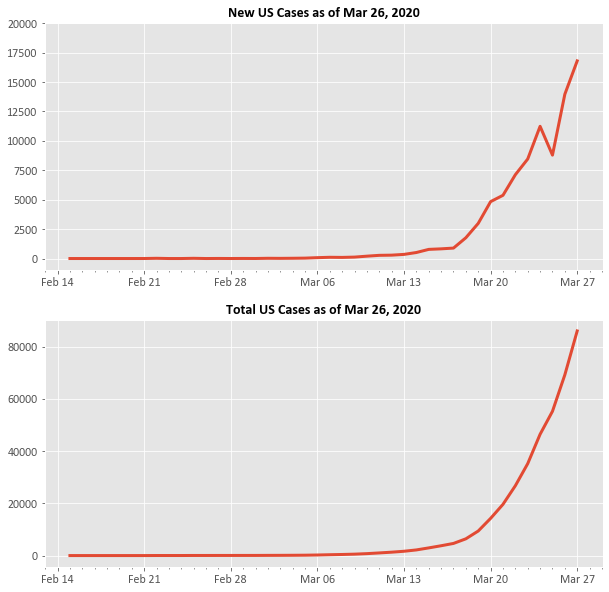

In [144]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#plot 'new_cases' from United States from Feb 15 - Current Date 
ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')["2020-02-15":].new_cases, linewidth=3)
ax1.set_ylim((-1000,20000))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax1.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
ax1.set_title('New US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')["2020-02-15":].total_cases, linewidth=3)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
for tick in ax2.get_xticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Calibri")
    tick.set_fontsize(12)
#ax2.set_title('Total US Cases', fontsize=14, fontweight="bold", fontname="Calibri")
ax2.set_title('Total US Cases as of ' + d.strftime('%b %d, %Y'), fontsize=14, fontweight="bold", fontname="Calibri")

plt.show()

In [197]:
# return multiple columsn for row with the maximum number of new deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['new_deaths'] == df_us['new_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-21,United States,5374,19624,110,260


In [198]:
# return location and new cases for row with the maximum number of total deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['total_deaths'] == df_us['total_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-22,United States,7123,26747,80,340


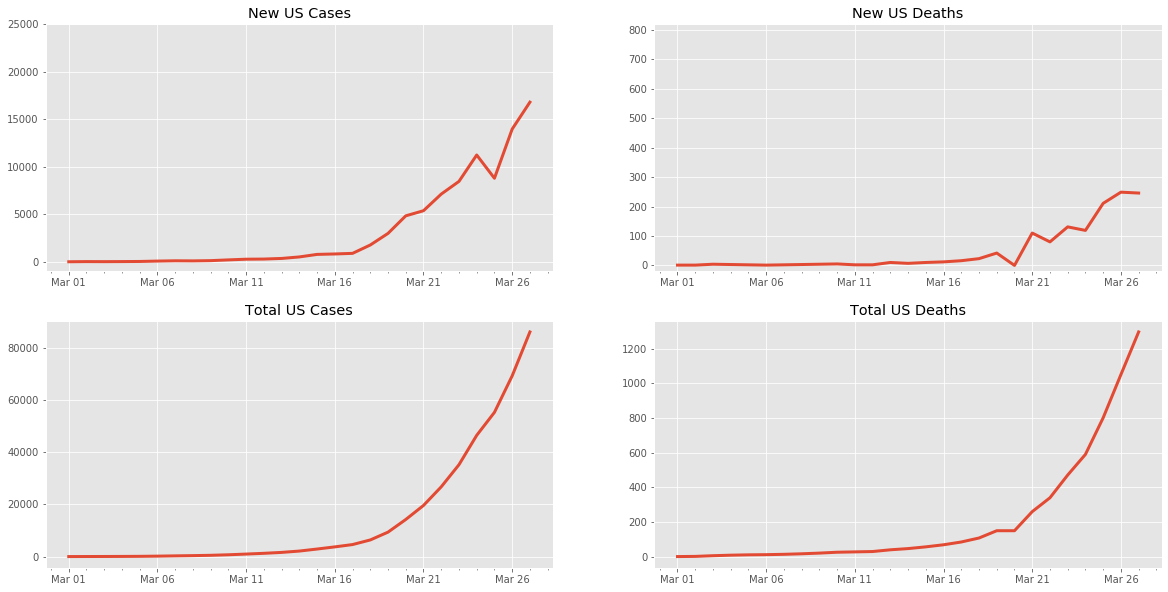

In [145]:
plt.style.use('ggplot')
#plt.xkcd()

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from location grouped dataframe
ax1.plot(dfloc.get_group('United States')["2020-03-01":].new_cases, linewidth=3)
#set y-limit to match scale of total cases
ax1.set_ylim((-1000,25000))
#set ticks every week
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set major ticks at seven spots
#ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')

ax2 = plt.subplot(223)
ax2.plot(dfloc.get_group('United States')["2020-03-01":].total_cases, linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')

ax3 = plt.subplot(222)
#ax3.plot(df_mar_us.new_deaths.resample('D').mean())
ax3.plot(dfloc.get_group('United States')["2020-03-01":].new_deaths, linewidth=3)
ax3.set_ylim((-20,820))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')

ax4 = plt.subplot(224)
ax4.plot(dfloc.get_group('United States')["2020-03-01":].total_deaths, linewidth=3)
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU, WE)))
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')

plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[3, 20, 14, 22, 34, 74, 105, 95, 121, 200, 271, 287, 351, 511, 777, 823, 887, 1766, 2988, 4835, 5374, 7123, 8459, 11236, 8789, 13963, 16797]
[69, 89, 103, 125, 159, 233, 338, 433, 554, 754, 1025, 1312, 1663, 2174, 2951, 3774, 4661, 6427, 9415, 14250, 19624, 26747, 35206, 46442, 55231, 69194, 85991]


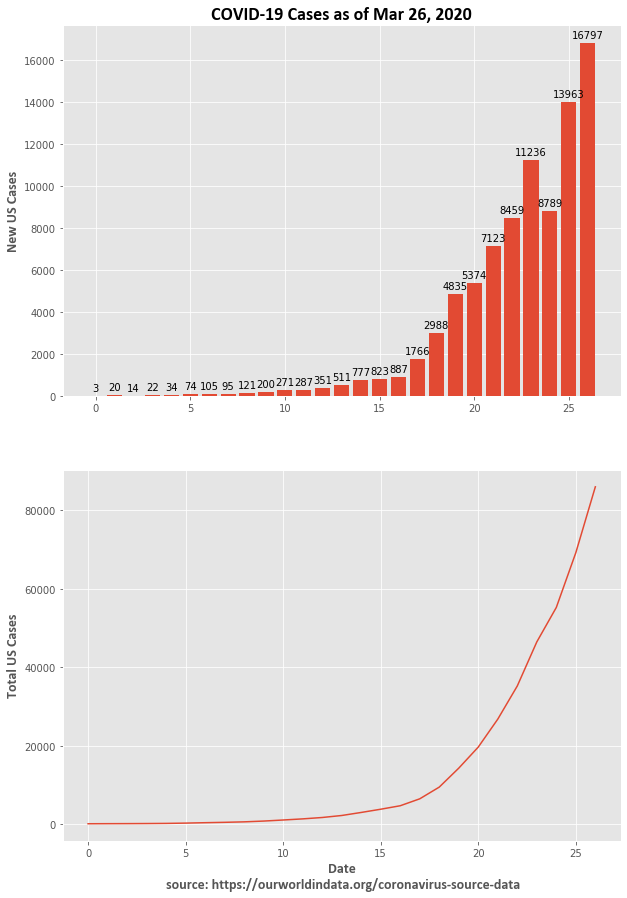

In [146]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

#x_indexes = np.arange(len(dfloc.get_group('United States')["2020-02-15":].total_cases))
#print(x_indexes)

#loop through dates, and cases to get x and y data to test for x axis labels
firstday = dt.datetime(2020, 3, 1)
x = []
xl = []
y = []
y2 = []
count = 0
for index, rows in df100.iterrows():
    if rows.location == "United States":
        if rows.date >= firstday:
            #x_row = int(rows.date.strftime("%d"))
            x_row = count
            xl_row = rows.date
            y_row = rows.new_cases
            y2_row = rows.total_cases
            x.append(x_row)
            xl.append(xl_row)
            y.append(y_row)
            y2.append(y2_row)
            count += 1

#x.append(26)
#x = np.arange(len(dfloc.get_group('United States')["2020-03-01":].index))  # the label locations
print(x)
print(y)
print(y2)
width = 0.35  # the width of the bars

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

rects1=ax1.bar(x, y)
ax2.plot(x, y2)
autolabel(rects1)
# autolabel(rects2)
#ax1=dfloc.get_group('United States')["2020-02-15":].new_cases.plot(ax=axes[0], color='orange', kind='bar')
#dfloc.get_group('United States')["2020-03-01":].new_cases.plot(kind='bar', ax=ax1, fontsize=12, xticks=x)
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax1=ax1.set_ylim((-1000,20000))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1=ax1.xaxis.set_minor_locator(mdates.DayLocator())
#ax2=dfloc.get_group('United States')["2020-02-15":].total_cases.plot(ax=axes[1], color='green', kind='line')
#dfloc.get_group('United States')["2020-03-01":].total_cases.plot(ax=ax2, color='red', linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#set y-limit to match scale of total cases
#ax1.set_ylim((-1000,20000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.show()

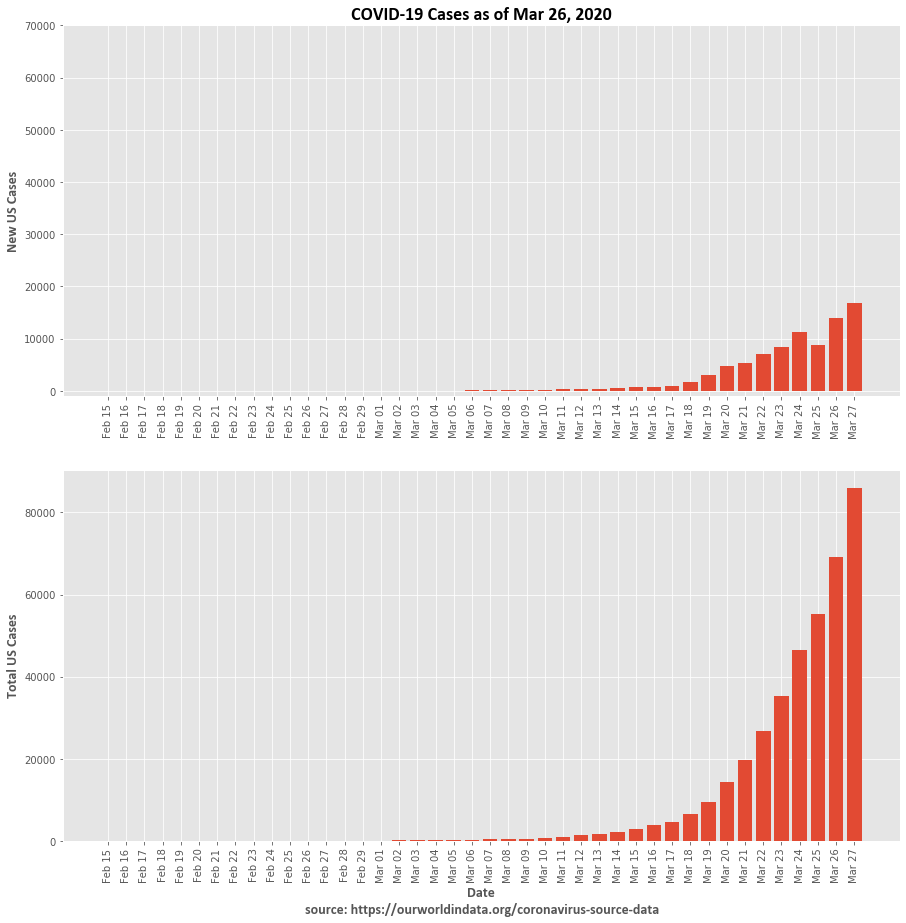

In [127]:
# define figure container (e.g. the canvas) size
fig = plt.figure(figsize=(15,15))

# add subplots to the figure
ax1 = fig.add_subplot(2,1,1) # 2 rows, 1 col, position 1)
ax2 = fig.add_subplot(2,1,2) # 2 rows, 1 col, position 2)

# filter out US cases since 2020-03-01
#loop through dates, and cases to get x and y data to test for x axis labels
# firstday = dt.datetime(2020, 3, 1)
# x = []
# xl = []
# y = []
# y2 = []
# count = 0
# for index, rows in df100.iterrows():
#     if rows.location == "United States":
#         if rows.date >= firstday:
#             x_row = int(rows.date.strftime("%d"))
#             #x_row = count
#             xl_row = rows.date.strftime("%b %d")
#             y_row = int(rows.new_cases)
#             y2_row = int(rows.total_cases)
#             x.append(x_row)
#             xl.append(xl_row)
#             y.append(y_row)
#             y2.append(y2_row)
#             count += 1
# #print(x,xl,y,y2)
# mydf = pd.DataFrame(list(zip(x,xl,y,y2)), columns =['day', 'date', 'new_cases', 'total_cases'])
# mydf.head()

# # x-axis is the date, Y axis is the number of cases
# ax1.bar(mydf.date, mydf['new_cases'])
# ax1.set_xticklabels(mydf.date, rotation=45, horizontalalignment='right')

# # x-axis is the date, Y axis is the number of cases
# ax2.bar(mydf.date, mydf['total_cases'])
# ax2.set_xticklabels(mydf.date, rotation=45, horizontalalignment='right')

# x-axis is the date, Y axis is the number of cases
ax1.bar(dfloc.get_group('United States')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United States')["2020-02-15":].new_cases)
ax1.set_xticklabels(dfloc.get_group('United States')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# x-axis is the date, Y axis is the number of cases
ax2.bar(dfloc.get_group('United States')["2020-02-15":].index.strftime("%b %d"), dfloc.get_group('United States')["2020-02-15":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United States')["2020-02-15":].index.strftime("%b %d"), rotation=90)

# #set y-limit to match scale of total cases
ax1.set_ylim((-1000,70000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data', fontsize=14, fontweight="bold", fontfamily="calibri")

plt.show()

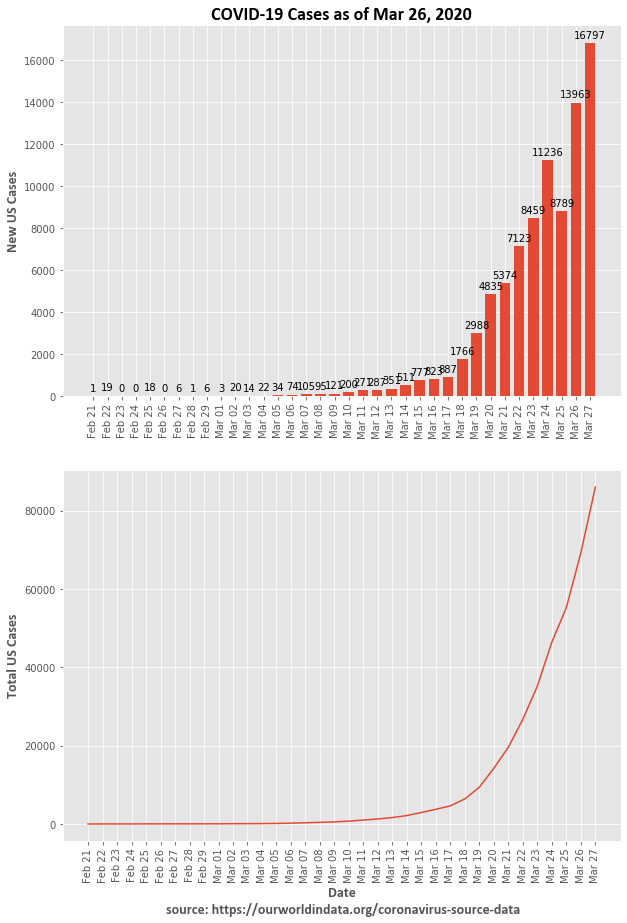

In [152]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# function to label bars of bar chart
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# x-axis is the date, Y axis is the number of cases
rects1=ax1.bar(dfloc.get_group('United States')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United States')["2020-02-21":].new_cases, width=0.75)
ax1.set_xticklabels(dfloc.get_group('United States')["2020-02-21":].index.strftime("%b %d"), rotation=90)
autolabel(rects1)

# x-axis is the date, Y axis is the number of cases
ax2.plot(dfloc.get_group('United States')["2020-02-21":].index.strftime("%b %d"), dfloc.get_group('United States')["2020-02-21":].total_cases)
ax2.set_xticklabels(dfloc.get_group('United States')["2020-02-21":].index.strftime("%b %d"), rotation=90)

#set y-limit to match scale of total cases
#ax1.set_ylim((-1000,20000))

ax1.set_title('COVID-19 Cases as of ' + d.strftime('%b %d, %Y'), fontsize=18, fontweight="bold", fontfamily="calibri")
ax1.set_ylabel('New US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_ylabel('Total US Cases', fontsize=14, fontweight="bold", fontfamily="calibri")
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data', fontsize=14, fontweight="bold", fontfamily="calibri")
plt.show()